<a href="https://colab.research.google.com/github/Devyanshsharma/Payment_Dependency/blob/main/payment_mode_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 > Cleaning of data...

Q2 > Is there any relationship between total fare amount and payment mode ?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Daily Household Transactions.csv')

In [ ]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [ ]:
df.shape

(2130, 7)

In [ ]:
df.dtypes

,0
Date,object
Mode,object
Category,object
Subcategory,object
Note,object
Amount,float64
Income/Expense,object
Currency,object


# **Cleaning data**

In [ ]:
df['Date']=df['Date'].str.split(' ').str[0]

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['day']=df['Date'].dt.day_name()

In [ ]:
df.isna().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0
day,0


In [ ]:
635/len(df)*100

25.802519301097114

In [ ]:
df=df.drop('Subcategory',axis=1)
df=df.drop('Note',axis=1)

In [ ]:
df['Amount']=df['Amount'].astype(int)

In [ ]:
# we can also use df.dulpicated() for remove duplicate values but in this case we can not remove because same transition can be done in day and we alread clean time from datetime row
# df[df.duplicated()]
# df.drop_duplicates(inplace=True)

,Date,Mode,Category,Amount,Income/Expense,Currency,day
130,2018-07-20,Cash,Food,25,Expense,INR,Friday
209,2018-06-27,Cash,Household,100,Expense,INR,Wednesday
277,2018-05-14,Cash,Transportation,40,Expense,INR,Monday
320,2018-04-30,Cash,Food,72,Expense,INR,Monday
355,2018-04-15,Cash,Food,70,Expense,INR,Sunday
...,...,...,...,...,...,...,...
2344,2015-02-15,Cash,Food,20,Expense,INR,Sunday
2350,2015-02-12,Cash,Food,10,Expense,INR,Thursday
2434,2015-01-06,Cash,Food,15,Expense,INR,Tuesday
2456,2015-01-01,Cash,Transportation,20,Expense,INR,Thursday


In [ ]:
usefullmode=df['Mode'].value_counts()

In [ ]:
df['Mode'].value_counts()

,count
Mode,
Saving Bank account 1,1223
Cash,1046
Credit Card,162
Equity Mutual Fund B,11
Share Market Trading,5
Saving Bank account 2,5
Recurring Deposit,3
Debit Card,2
Equity Mutual Fund C,1


In [ ]:
use=usefullmode[usefullmode > 20].index

In [ ]:
df=df[df['Mode'].isin(use)]

In [ ]:
df.head()

,Date,Mode,Category,Amount,Income/Expense,Currency,day
0,2018-09-20,Cash,Transportation,30,Expense,INR,Thursday
1,2018-09-20,Cash,Food,60,Expense,INR,Thursday
2,2018-09-19,Cashless,subscription,199,Expense,INR,Wednesday
3,2018-09-17,Cashless,subscription,19,Expense,INR,Monday
4,2018-09-16,Cash,Festivals,251,Expense,INR,Sunday


In [ ]:
df['Mode'].replace(['Credit Card','Saving Bank account 1'],'Cashless',inplace = True)

In [ ]:
df['Mode'].value_counts()

,count
Mode,
Cashless,1385
Cash,1046


In [ ]:
df.describe()

,Date,Amount
count,2431,2431.000000
mean,2017-03-30 16:58:14.858083072,2539.289593
min,2015-01-01 00:00:00,2.000000
25%,2016-10-10 00:00:00,34.000000
50%,2017-06-18 00:00:00,100.000000
75%,2018-01-14 00:00:00,760.000000
max,2018-09-20 00:00:00,250000.000000
std,NaN,11621.942687


<Axes: ylabel='Amount'>

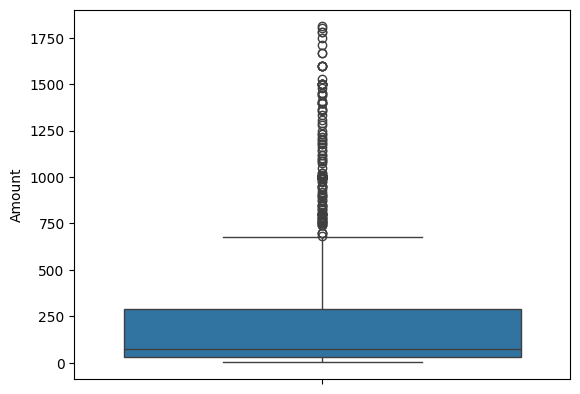

In [ ]:
sns.boxplot(df['Amount'])

In [ ]:
Amount=df['Amount']

In [ ]:
np.mean(Amount)

255.31690140845072

In [ ]:
amo=Amount[Amount<100000]

In [ ]:
df=df[df['Amount'].isin(amo)]

(array([2264.,   94.,    8.,    5.,    0.,    5.,   21.,   13.,   12.,
           4.]),
 array([2.00000e+00, 7.83160e+03, 1.56612e+04, 2.34908e+04, 3.13204e+04,
        3.91500e+04, 4.69796e+04, 5.48092e+04, 6.26388e+04, 7.04684e+04,
        7.82980e+04]),
 <BarContainer object of 10 artists>)

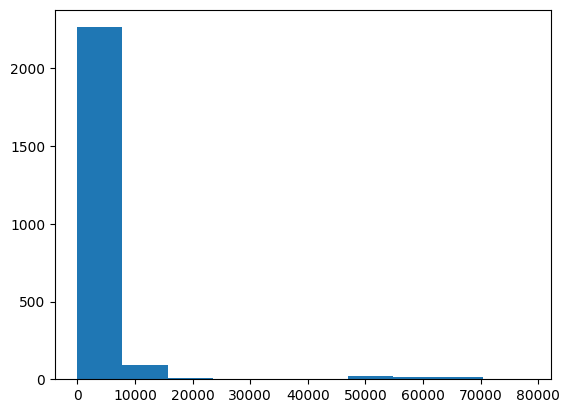

In [ ]:
plt.hist(df['Amount'])

In [ ]:
# zescores, intelquatialrange are 2 ways to remove outliers
for col in['Amount']:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  low=q1-1.5*iqr
  high=q3+1.5*iqr
  df=df[(df[col]>low) & (df[col]<high)]

#Testing

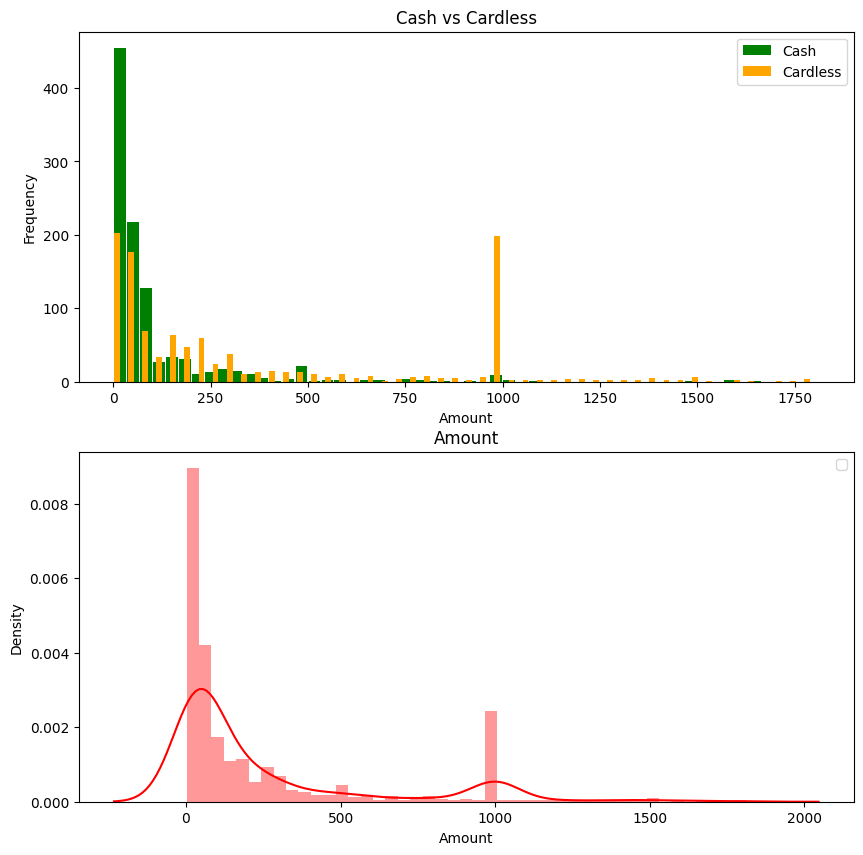

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.hist(df[df['Mode']=='Cash']['Amount'],label='Cash',zorder=1,width=30,bins=50,color='green')
plt.hist(df[df['Mode']=='Cashless']['Amount'],label='Cardless',width=15,bins=50,color='orange')

plt.legend()
plt.title('Cash vs Cardless')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.subplot(2,1,2)

sns.distplot(df['Amount'],color='red')
plt.title('Amount')
plt.legend()
plt.show()

Mode based on category

([<matplotlib.patches.Wedge at 0x7fab3d4e5c30>,
 [Text(-0.06647869223396864, 1.097989336687229, 'Cashless'),
  Text(0.0664787950351493, -1.09798933046304, 'Cash')],
 [Text(-0.036261104854891986, 0.5989032745566704, '51.9%'),
  Text(0.03626116092826325, -0.5989032711616581, '48.1%')])

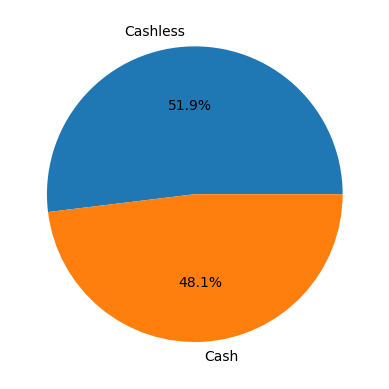

In [ ]:
plt.pie(df['Mode'].value_counts(),labels=df['Mode'].value_counts().index,autopct='%1.1f%%')


In [ ]:
df.groupby('day')['Amount'].mean().sort_values(ascending=False)

,Amount
day,
Friday,294.524194
Wednesday,282.149378
Saturday,266.843333
Monday,261.767956
Thursday,252.686275
Tuesday,250.604730
Sunday,202.840849


# **T Test**

H0 There is no significant relationship between the total fare amount and the payment mode.

H1 There is a significant relationship between the total fare amount and the payment mode.

In [ ]:
cash= df[df['Mode']=='Cash']['Amount']
np.random.seed(10)
sample_cash=np.random.choice(cash,25)
cashless=df[df['Mode']=='Cashless']['Amount']
sample_cashless=np.random.choice(cashless,25)
std_cash=sample_cash.std()
std_cashless=sample_cashless.std()
n=len(sample_cash)
m=len(sample_cashless)
alpha=0.05

In [ ]:
t=(sample_cash.mean()-sample_cashless.mean())/np.sqrt((np.var(cash)/n)+np.var(cashless)/m)

In [ ]:
# zvalue for this is
scipy.t.ppf(1-alpha/2,n-2)

2.0686576104190406

In [ ]:
if abs(t) > scipy.t.ppf(1-alpha/2,n-2):
  print('Reject null hypothesis based on critical value comparison: yes there is significant relationship between total fare amount and payment mode')
else:
  print('Accept null hypothesis based on critical value comparison : there is no significant relationship between total fare amount and payment mode')

Reject null hypothesis based on critical value comparison: yes there is relationship between total fare amount and payment mode


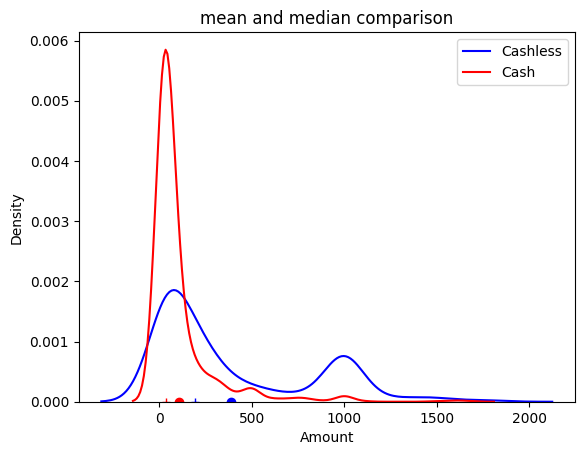

In [ ]:
sns.kdeplot(cashless,color='blue')
sns.kdeplot(cash,color='red')
plt.title('mean and median comparison')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend(['Cashless','Cash'])
plt.plot(np.mean(cashless),0,'o',color='blue')
plt.plot(np.median(cashless),0,'+',color='blue')
plt.plot(np.mean(cash),0,'o',color='red')
plt.plot(np.median(cash),0,'+',color='red')
# plt.plot([np.mean(Amount) for i in range(.1)],[i for i in range(.1)])

plt.show()